# The Sparks Foundation
## Task 3: Exploratory Data Analysis - Retail


## Sohini Mukherjee (2.04.2021)

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting Data

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


## Cleaning data

In [5]:
#deleting duplicate rows
df.drop_duplicates(keep= 'first',inplace=True)

In [6]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploratory Data Analysis
 What are total Sales and Profits of the company?

In [7]:
SalesProfits = df.groupby("Segment").sum().iloc[:,[1,-1]].sum()
round(SalesProfits,2) # Rounding Numericala entries to 2 decimal places

Sales     2296195.59
Profit     286241.42
dtype: float64

Top 10 States by Sales and Profits

In [8]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)
print('Top 10 Sales: ',Top_10_Sales)
print('\n')
print('Tope 10 Profits: ', Top_10_Profits)

Top 10 Sales:  State
California      457576.2715
New York        310827.1510
Texas           170124.5418
Washington      138560.8100
Pennsylvania    116496.3620
Florida          89473.7080
Illinois         80162.5370
Ohio             77976.7640
Michigan         75879.6440
Virginia         70636.7200
Name: Sales, dtype: float64


Tope 10 Profits:  State
California    76330.7891
New York      74015.4622
Washington    33368.2375
Michigan      24428.0903
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


In [9]:
print('Top 10 States by Sales: ', Top_10_Sales.index)
print('\n')
print('Top 10 States by Profit: ', Top_10_Profits.index)

Top 10 States by Sales:  Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania',
       'Florida', 'Illinois', 'Ohio', 'Michigan', 'Virginia'],
      dtype='object', name='State')


Top 10 States by Profit:  Index(['California', 'New York', 'Washington', 'Michigan', 'Virginia',
       'Indiana', 'Georgia', 'Kentucky', 'Minnesota', 'Delaware'],
      dtype='object', name='State')


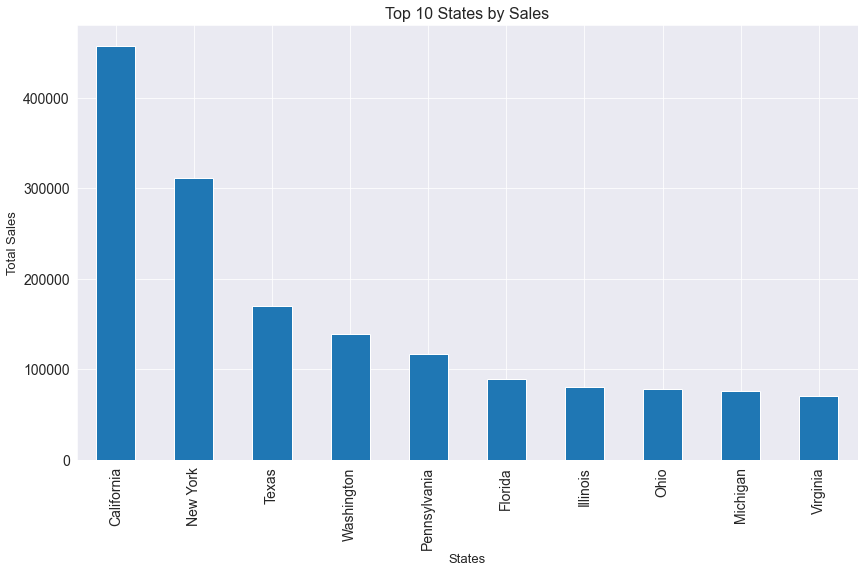

In [10]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

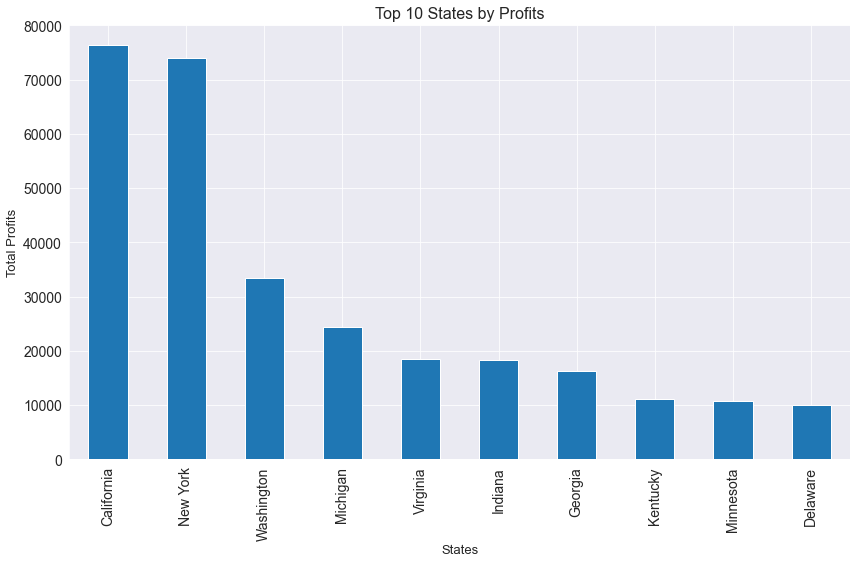

In [11]:
sns.set_style('darkgrid')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

Calfornia and New York are ahead of their competitors.

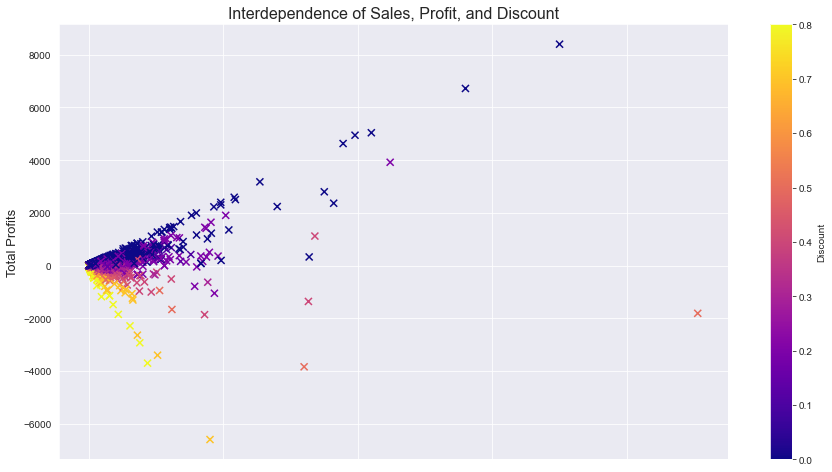

In [12]:
sns.set_style('darkgrid')
df.plot(kind = "scatter", figsize = (15,8), x = "Sales", y ="Profit" ,c ="Discount", s =50, marker ="x",colormap ="plasma")
plt.ylabel("Total Profits",fontsize =13)
plt.title("Interdependence of Sales, Profit, and Discount",fontsize =16)
plt.show()

## Relation analysis

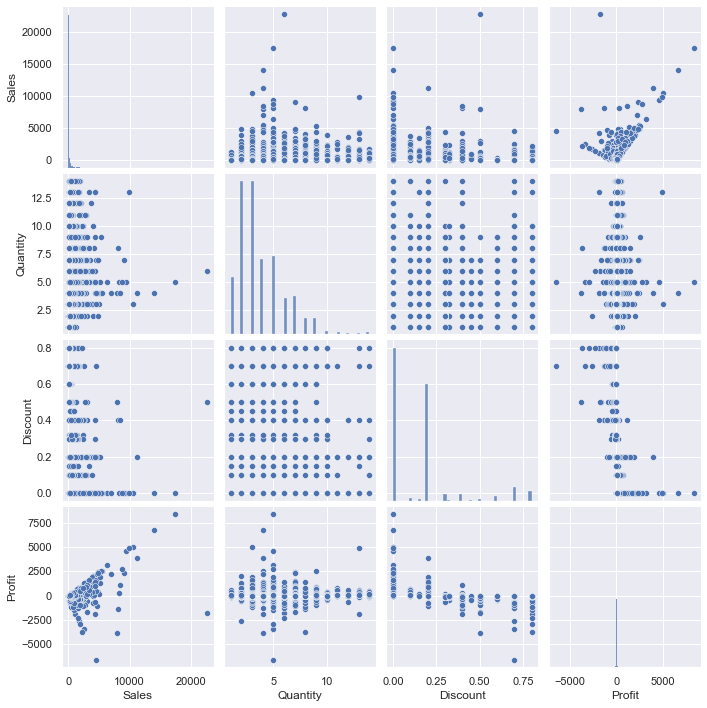

In [13]:
sns.set_theme('notebook')
financial=df.loc[:,['Sales','Quantity','Discount','Profit']]
sns.pairplot(financial)

<AxesSubplot:>

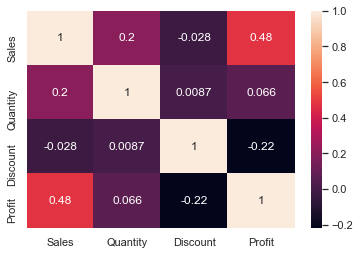

In [14]:
correlation=financial.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

From Above map we infer that, 

1)sales and profits are positively correlated

2)Discount and Profits are Negatively correlated

## Case-1 When Discount is 0

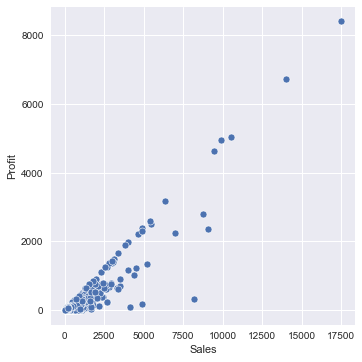

In [15]:
plt.style.use('seaborn')
data=df[df['Discount']==0]
sns.relplot(x='Sales',y='Profit',data=data)

<AxesSubplot:>

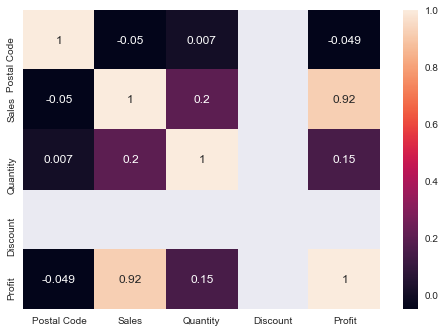

In [16]:
correlation=data.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

There is strong correlation between sales and Profit i.e 0.92

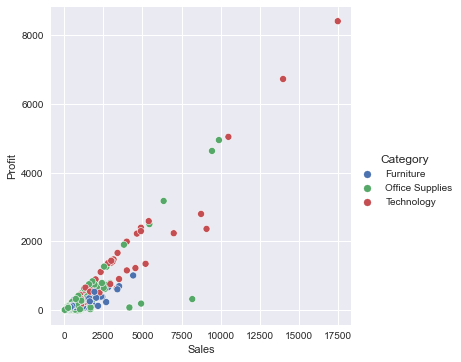

In [17]:
#Rel_plot with respect to category
sns.relplot(x='Sales',y='Profit',hue='Category',data=data)

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

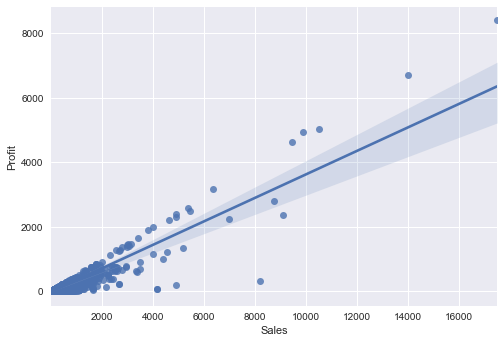

In [18]:
# Regression Plot 
sns.regplot(x=data['Sales'],y=data['Profit'])

There is positive trend between Profit and sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

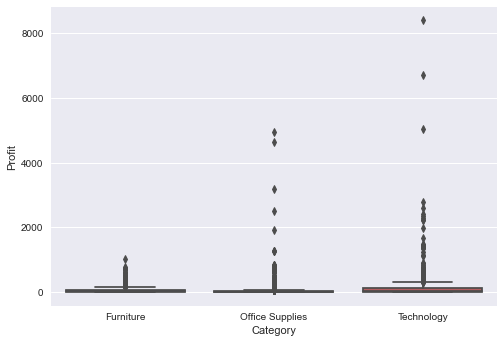

In [19]:
sns.boxplot(x='Category',y='Profit',data=data)

## Case-2 When Discount is Not 0

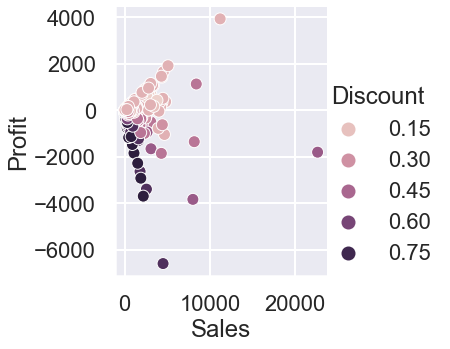

In [20]:
sns.set_theme('poster')
data1=df[df['Discount']!=0]
sns.relplot(x='Sales',y='Profit',hue='Discount',data=data1)

**As percentages of Discount increases the sales is also goes increases but profit goes decreases**

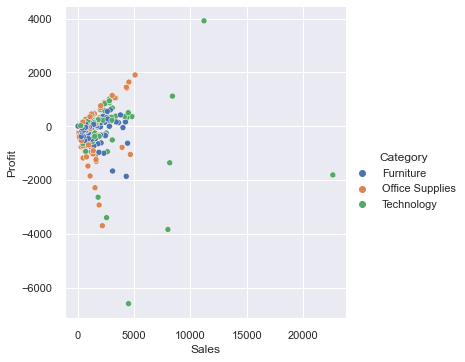

In [21]:
sns.set_theme('notebook')
sns.relplot(x='Sales',y='Profit',hue='Category',data=data1)

<AxesSubplot:>

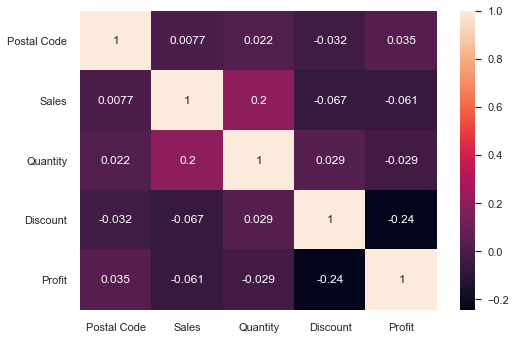

In [22]:
correlation=data1.corr()
sns.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

<AxesSubplot:xlabel='Sub-Category'>

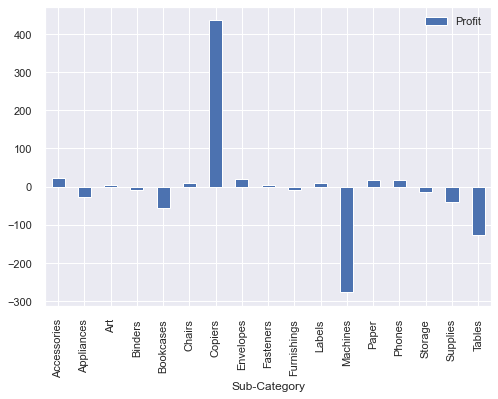

In [23]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Profit')
pivot.plot(kind='bar')

**copiers had highest Profit and Machines had highest loss**

<AxesSubplot:xlabel='Sub-Category'>

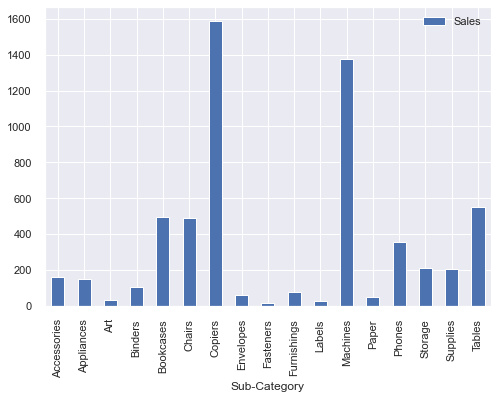

In [24]:
pivot=pd.pivot_table(data1,index='Sub-Category',values='Sales')
pivot.plot(kind='bar')

copiers had highest sale and Machines had second highest sales

'Machines' had second highest sale but due to large discount it is in loss and in second graph we see that sales in 'Fasteners','labels'and 'Art' category are so weak.so we have to concentrate on these sub-category businesses

**Distrubution of Profits across diffrent regions**

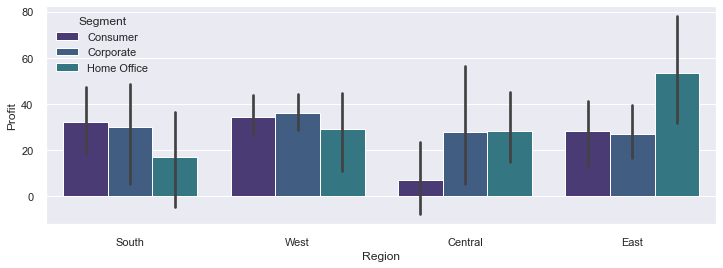

In [25]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Segment")
plt.show()

Overall each Segment is profitable

**Profit distribution by Region**

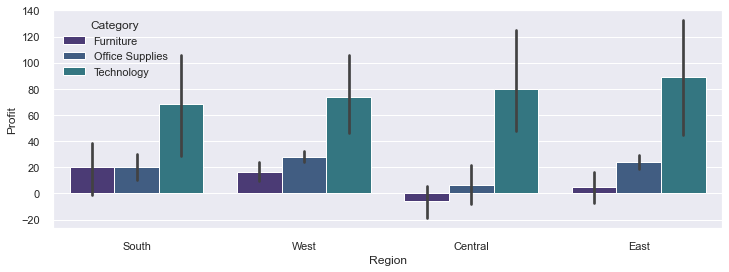

In [26]:
plt.figure(figsize = (12,4))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = df , x = "Region",y = "Profit" ,hue = "Category")
plt.show()

"Furniture" Category is the only loss making sector that to only in Central Region

**Investigating losses in Furniture category in the Central region**

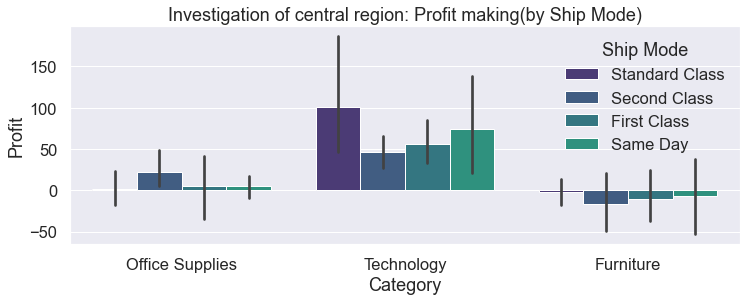

In [27]:
gb_Central = list(df.groupby("Region"))[0][1]
plt.figure(figsize = (12,4))
sns.set(font_scale=1.5, palette= "viridis")
sns.barplot(data = gb_Central, x = "Category",y = "Profit" ,hue = "Ship Mode")
plt.title("Investigation of central region: Profit making(by Ship Mode)")
plt.show()


Losses are inccured in Furniture Cateory irrespective to ship mode in Central Region

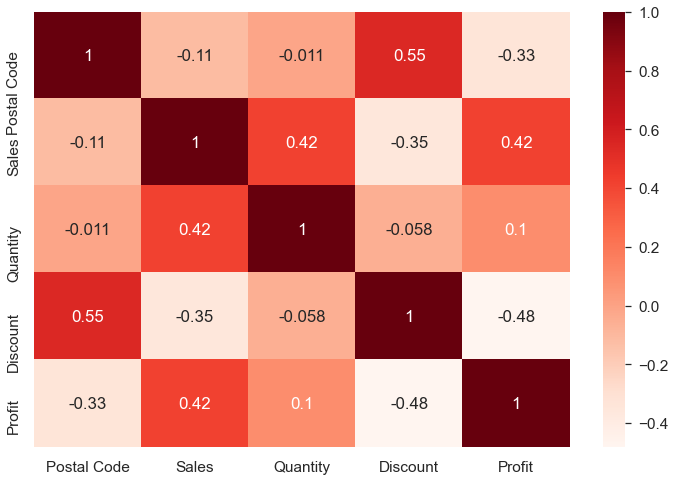

In [28]:
gb_Category_Furniture =list(list(df.groupby("Region"))[0][1].groupby("Category"))[0][1]

plt.figure(figsize = (12,8))
sns.set(font_scale=1.4)
sns.heatmap(gb_Category_Furniture.corr() , annot = True, cmap ="Reds")
plt.show()

There is unusually high positive correlation between Postal Code and Discount. There is negative correlation between Discount and Sales even though dicounts are entered as positive values i.e. they are not helping in improving sales of "Furniture" category of the company

**individual performance by states in the central region**

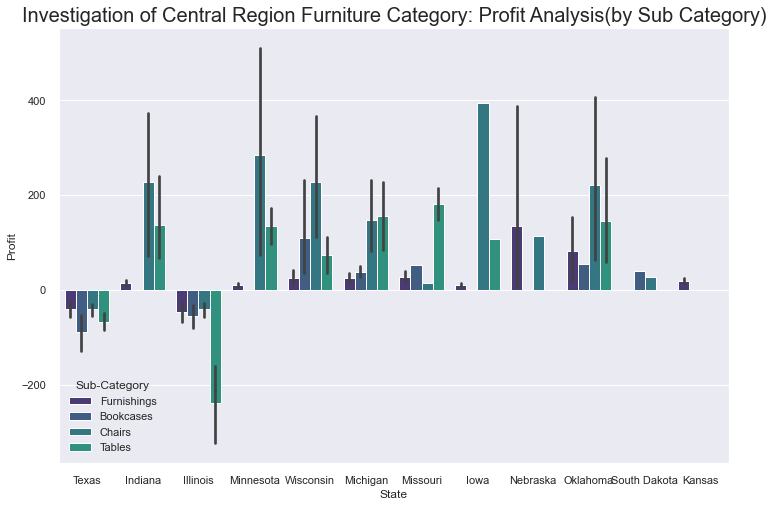

In [29]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Sub-Category")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Sub Category)", fontsize = 20)
plt.show()

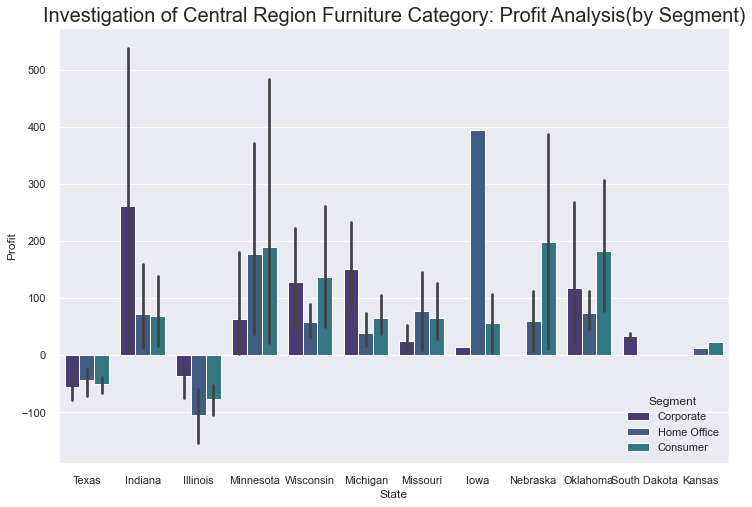

In [30]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Profit" ,hue = "Segment")
plt.title("Investigation of Central Region Furniture Category: Profit Analysis(by Segment)", fontsize = 20)
plt.show()

Texas and Illiois are only two states contributing to all the losses in Furniture category in the Central Region

what is it they are doing differently?

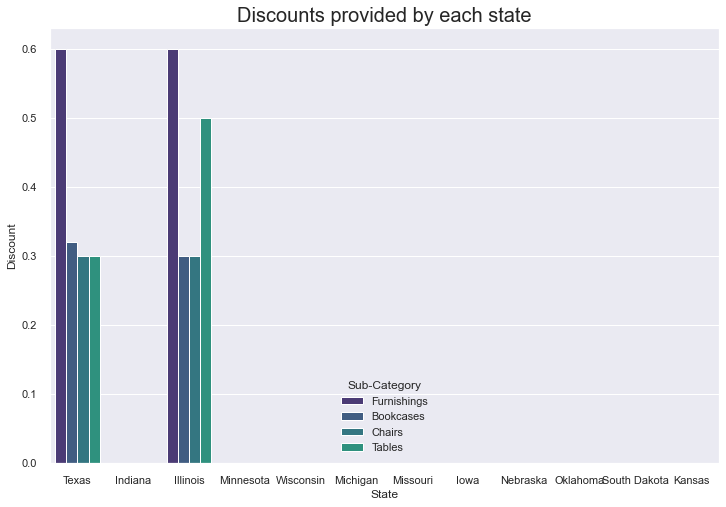

In [31]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1, palette= "viridis")
sns.barplot(data = gb_Category_Furniture , x = "State",y = "Discount" ,hue = "Sub-Category")
plt.title("Discounts provided by each state", fontsize = 20)
plt.show()

Texas and Illinois are only states providing discounts in the whole central region this justifies high positive correlation between postal codes and discounts. The are also very high. 

Are these discounts driving sales up?

<Figure size 864x576 with 0 Axes>

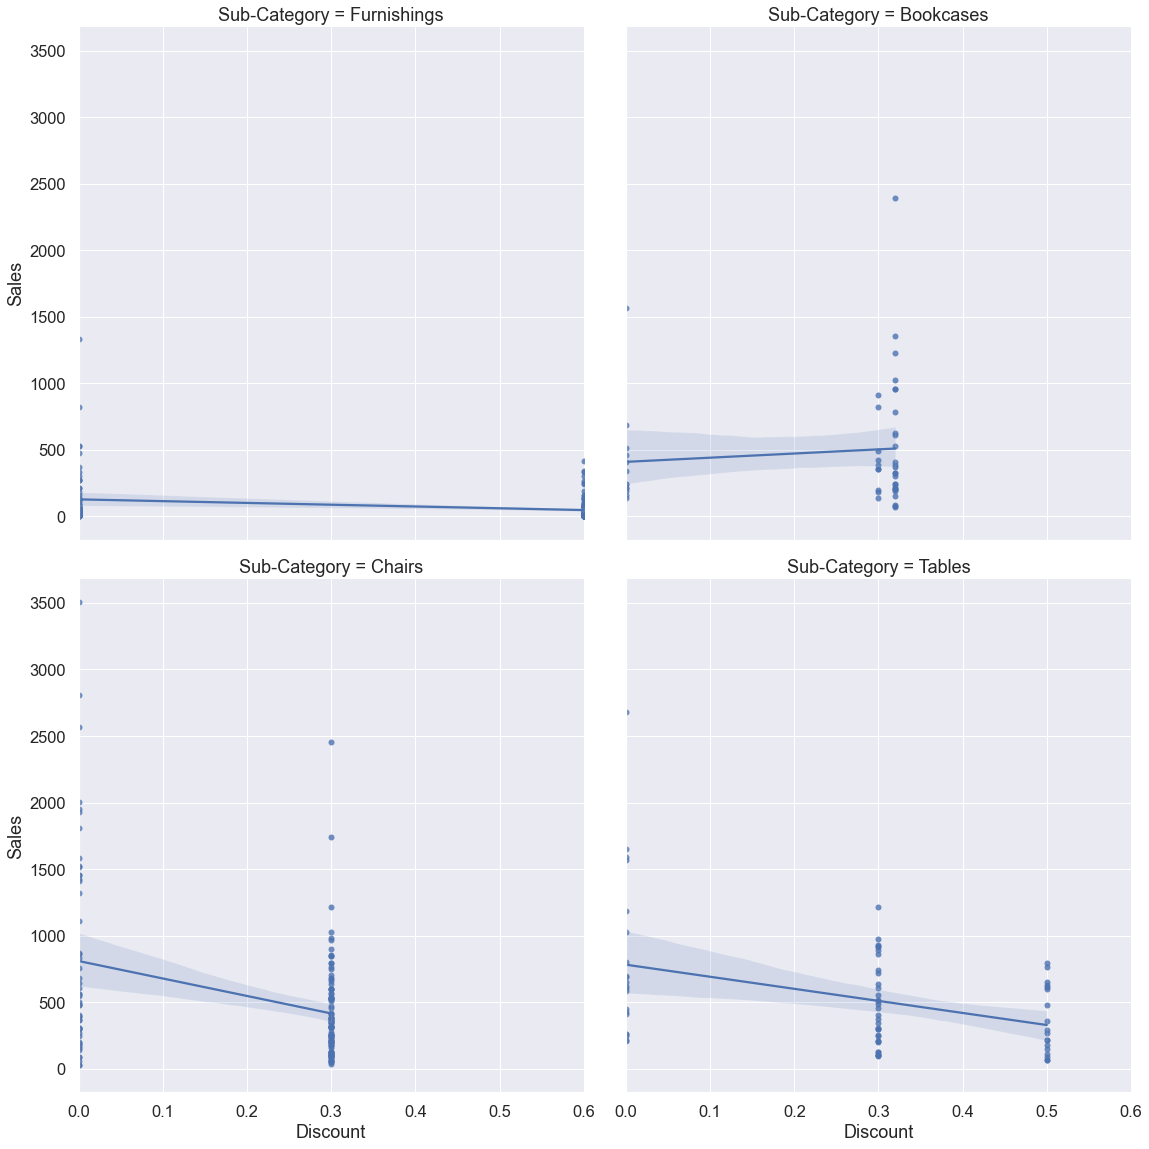

In [32]:
plt.figure(figsize = (12,8))
sns.set(font_scale=1.5)
sns.lmplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", aspect = 1, height = 8, col ="Sub-Category", col_wrap= 2)
plt.show()

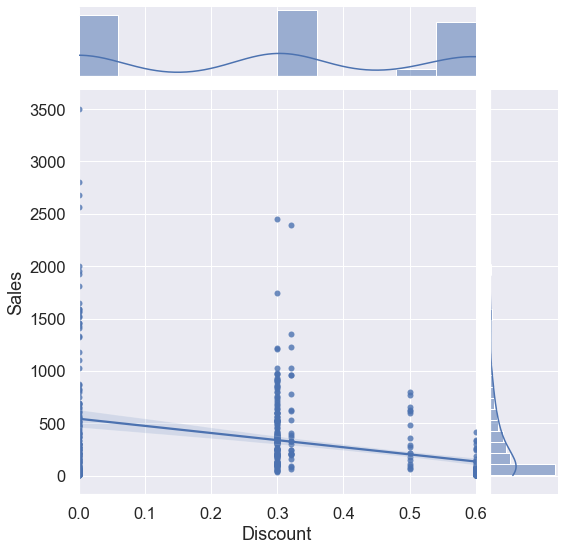

In [34]:
# Joint plot for studying overall relationship between Sales and Discounts
sns.set(font_scale=1.5)
sns.jointplot(data = gb_Category_Furniture , x = "Discount", y ="Sales", height = 8, kind = "reg")
plt.show()

Sales go down when discounts go up in 3 out of 4 "Subcategories" and in overall Furniture Category Sales in the Central Region.